In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
df_long_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_r250mm_p10cm_lengthx10_1232173pts_09-07_160736',input_type = 'pkl').data_frame
df_short_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_1232173pts_08-10_094943',input_type = 'pkl').data_frame


/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:842: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.



In [ ]:
phi=np.pi/2
fig = mu2e_plot3d(df_short_250mm, 'R', 'Z', 'Bz', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Bz, Solenoid B', df_fit=False, mode='plotly_nb', ptype='3d', units='m', aspect='rect2',
                save_dir='/Users/brianpollack/Documents/Notes_Papers/Helix/figs/')
pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bz_B.png')

In [ ]:
phi=0
fig = mu2e_plot3d(df_short_250mm, 'R', 'Z', 'Br', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Br, Solenoid B', df_fit=False, mode='plotly_nb', ptype='3d', units='m', aspect='rect2',)
pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_br_B.png')

In [ ]:
phi=3*np.pi/4
fig = mu2e_plot3d(df_short_250mm, 'R', 'Z', 'Bphi', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Btheta, Solenoid B', df_fit=False, mode='plotly_nb', ptype='3d', units='m', aspect='rect2',)
pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bt_B.png')

In [ ]:
#ff_list = []
cfg_params_Cole = cfg_params(ns=1, ms=2, cns=0, cms=0, nms=0, Reff=0.1,
                             n_scale=1, m_scale=1, func_version=120)

cfg_pickle_Cole = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='phi_test', save_name='phi_test', recreate=False)

#for phi in tqdm_notebook((0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8), desc='phi'):
#for phi in tqdm_notebook((0,), desc='phi'):

hmd, ff = field_map_analysis('halltoy_phi_test', cfg_data_DS_Cole_Hel_10x2,
                                  cfg_geom_hel_250mm2, cfg_params_Cole,
                                  cfg_pickle_Cole, cfg_plot_none)
#ff_list.append(ff)

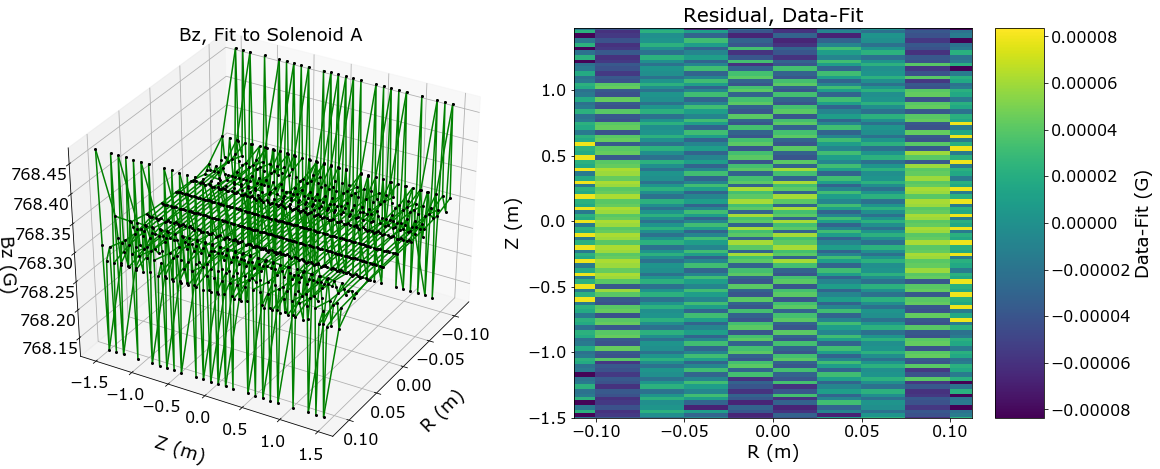

In [186]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Bz, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bz_A_fit.png')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bz_A_fit.png')

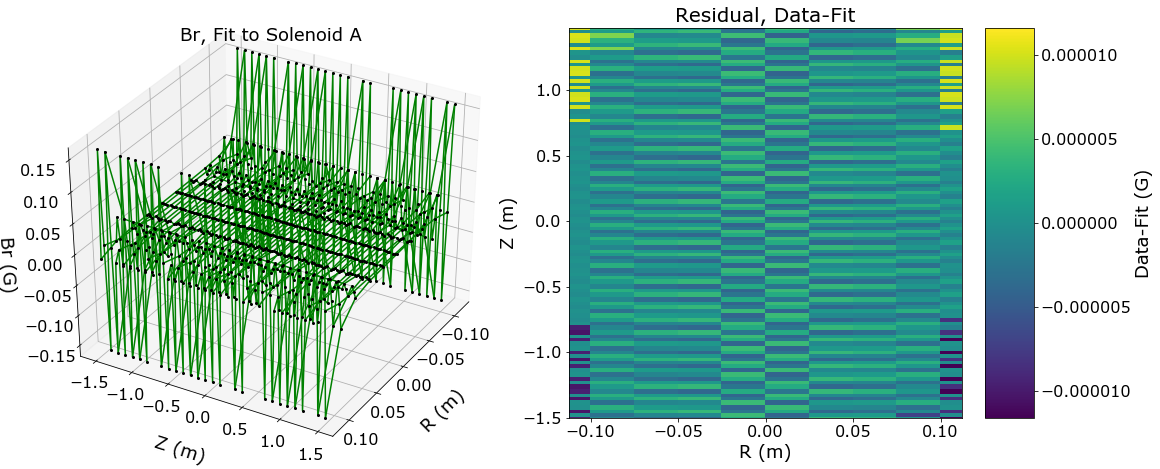

In [183]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Br, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_br_A_fit.png')
#pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_br_A_fit.png')

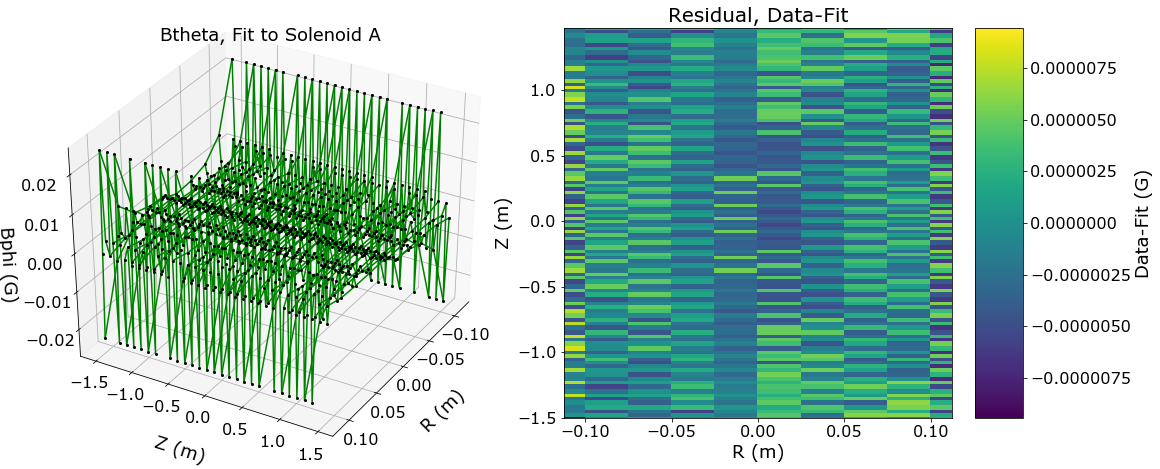

In [184]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Btheta, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bt_A_fit.png')

In [191]:
phi=0.463648
df_long_250mm[np.isclose(df_long_250mm.Phi, phi)].R.unique()

array([0.02795085, 0.0559017 , 0.08385255, 0.1118034 , 0.13975425,
       0.1677051 , 0.19565595, 0.2236068 , 0.25155765, 0.2795085 ])

In [195]:
cfg_pickle_rec = cfg_pickle(use_pickle=True, save_pickle=True,
                             load_name='phi_test', save_name='phi_test', recreate=True)

#for phi in tqdm_notebook((0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8), desc='phi'):
#for phi in tqdm_notebook((0,), desc='phi'):

_, ff_fullsim = field_map_analysis('halltoy_phi_test', cfg_data_DS_Cole_Hel_10x,
                                  cfg_geom_hel_250mm_fullsim, cfg_params_Cole,
                                  cfg_pickle_rec, cfg_plot_none)

recreating fit with func_version=120,
n=1, m=2, cn=0, cm=0
Elapsed time was 3.00297 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 24000
    # variables        = 0
    chi-square         = 0.00000
    reduced chi-square = 0.00000
    Akaike info crit   = -865709.27232
    Bayesian info crit = -865709.27232
[[Variables]]
    R:         0.1 (fixed)
    ns:        1 (fixed)
    ms:        2 (fixed)
    n_scale:   1 (fixed)
    m_scale:   1 (fixed)
    cns:       0 (fixed)
    cms:       0 (fixed)
    A_0_0:     0 (fixed)
    B_0_0:     0 (fixed)
    A_0_1:    -1.216144e-10 (fixed)
    B_0_1:    -1.651544e-09 (fixed)
    k1:        0 (fixed)
    k2:        0 (fixed)
    k3:        0.07682963 (fixed)
    k4:        0 (fixed)
    k5:        0 (fixed)
    k6:        0 (fixed)
    k7:        0 (fixed)
    k8:        0 (fixed)
    k9:        0 (fixed)
    k10:       0 (fixed)
    x1:        0.1567054 (fixed)
    y1:       -0.05435

In [199]:
df_fs =ff_fullsim.input_data

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
_ = splt.hist((df_fs.Bz-df_fs.Bz_fit)*1e4, ax=ax[0])
ax[0].set_title('Bz')
ax[0].set_ylabel('Counts')
_ = splt.hist((df_fs.Br-df_fs.Br_fit)*1e4, ax=ax[1])
ax[1].set_title('Br')
_ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit)*1e4, ax=ax[2])
ax[2].set_title('Btheta')
fig.suptitle('B Component Residuals')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_res_A.pdf')

# Determining Optimal Number of Free Params

In [65]:
df_aic = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
ms = range(1,5)
ns = list(range(1,5))+list(range(5,21,5))
do_pickle=False
for m in tqdm_notebook(ms, desc='ms'):
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=do_pickle, save_pickle=True,
                                     load_name='opt_test', save_name='opt_test', recreate=False)
        cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=m, ns_h1=n,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=0, ms_c1=0, ns_c1=0,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         version=1000)
        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                          cfg_geom_Cole_250mm_long_cyl, cfg_params_Hel_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic = df_aic.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        do_pickle=False

HBox(children=(IntProgress(value=0, description='ms', max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=8), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=1, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 9.45488 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 200
    # data points      = 28800
    # variables        = 15
    chi-square         = 4005.23973
    reduced chi-square = 0.13914
    Akaike info crit   = -56785.83220
    Bayesian info crit = -56661.81024
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     1 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -4.0628e-10 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   3.4104e-09 +/- 0        (0.00%) (init= 0)
    k1:        0 (fixed)
    

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=1, ns_h1=5, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 8.54344 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 151
    # data points      = 28800
    # variables        = 23
    chi-square         = 0.00965
    reduced chi-square = 0.00000
    Akaike info crit   = -429327.48390
    Bayesian info crit = -429137.31690
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     1 (fixed)
    ns_h1:     5 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -1.6001e-11 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:  -2.5567e-10 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    B

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=1, ns_h1=20, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 9.09759 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 122
    # data points      = 28800
    # variables        = 53
    chi-square         = 0.00966
    reduced chi-square = 0.00000
    Akaike info crit   = -429227.74367
    Bayesian info crit = -428789.53275
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      1 (fixed)
    ns_h1:      20 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -1.9453e-10 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   -3.6739e-10 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:

HBox(children=(IntProgress(value=0, description='ns', max=8), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 8.2627 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 28800
    # variables        = 17
    chi-square         = 4005.24128
    reduced chi-square = 0.13915
    Akaike info crit   = -56781.82101
    Bayesian info crit = -56641.26279
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -6.2308e-11 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   4.0427e-09 +/- 0        (0.00%) (init= 0)
    Ah1_1_0:   0 (fixed)
    B

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=5, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 10.2509 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 212
    # data points      = 28800
    # variables        = 33
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -631950.87786
    Bayesian info crit = -631678.02955
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     5 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -1.2049e-11 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   3.9082e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    B

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=15, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 19.9543 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 381
    # data points      = 28800
    # variables        = 73
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -632263.88753
    Bayesian info crit = -631660.31399
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      2 (fixed)
    ns_h1:      15 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -5.8483e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:    3.0679e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:

HBox(children=(IntProgress(value=0, description='ns', max=8), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 14.6332 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 230
    # data points      = 28800
    # variables        = 19
    chi-square         = 4005.24050
    reduced chi-square = 0.13916
    Akaike info crit   = -56777.82665
    Bayesian info crit = -56620.73217
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     3 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   1.2638e-09 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   1.3865e-09 +/- 0        (0.00%) (init= 0)
    Ah1_1_0:   0 (fixed)
    

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=4, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 18.445 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 351
    # data points      = 28800
    # variables        = 37
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -632464.07289
    Bayesian info crit = -632158.15206
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     3 (fixed)
    ns_h1:     4 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -2.1333e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   3.9885e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    Bh

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=15, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 33.3472 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 426
    # data points      = 28800
    # variables        = 103
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -632951.23821
    Bayesian info crit = -632099.62075
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      3 (fixed)
    ns_h1:      15 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:    1.1741e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:    3.3276e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=20, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 59.096 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 810
    # data points      = 28800
    # variables        = 133
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -633107.96216
    Bayesian info crit = -632008.30079
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      3 (fixed)
    ns_h1:      20 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -1.1125e-11 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:    3.8940e-12 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:

HBox(children=(IntProgress(value=0, description='ns', max=8), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=1, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 9.87773 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 144
    # data points      = 28800
    # variables        = 21
    chi-square         = 4005.24157
    reduced chi-square = 0.13917
    Akaike info crit   = -56773.81892
    Bayesian info crit = -56600.18818
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     4 (fixed)
    ns_h1:     1 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -1.7226e-09 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:  -1.7716e-09 +/- 0        (0.00%) (init= 0)
    Ah1_1_0:   0 (fixed)
    

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=4, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 15.943 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 194
    # data points      = 28800
    # variables        = 45
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -632853.91324
    Bayesian info crit = -632481.84736
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     4 (fixed)
    ns_h1:     4 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -9.2857e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   3.1132e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    Bh

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=10, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 36.29 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 479
    # data points      = 28800
    # variables        = 93
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -633086.25103
    Bayesian info crit = -632317.31488
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     4 (fixed)
    ns_h1:     10 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -7.2601e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   2.8593e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    B

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=15, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 32.2986 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 411
    # data points      = 28800
    # variables        = 133
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -633393.12086
    Bayesian info crit = -632293.45948
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      4 (fixed)
    ns_h1:      15 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -6.2938e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:    2.9874e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=4, ns_h1=20, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 58.175 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 703
    # data points      = 28800
    # variables        = 173
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -633550.14581
    Bayesian info crit = -632119.75920
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      4 (fixed)
    ns_h1:      20 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -1.3280e-11 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:    3.1439e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:

In [62]:
df_aic_cyl = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
ms = range(1,3)
ns = range(1,50,5)
for m in tqdm_notebook(ms, desc='ms'):
    do_pickle=False
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                                     load_name='opt_test', save_name='opt_test', recreate=False)
        cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=0.05, ms_c1=m, ns_c1=n,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         version=1000)


        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                          cfg_geom_Cole_250mm_long_cyl, cfg_params_Cyl_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic_cyl = df_aic_cyl.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        do_pickle=True

HBox(children=(IntProgress(value=0, description='ms', max=2), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=10), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=1, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 5.53079 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 28800
    # variables        = 13
    chi-square         = 4005.23481
    reduced chi-square = 0.13913
    Akaike info crit   = -56789.86759
    Bayesian info crit = -56682.38189
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0.05 (fixed)
    ms_c1:     1 (fixed)
    ns_c1:     1 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:   0 (fixed)
    Bc1_0_0:   0 (fixed)
    Dc1_0:     0 (fixed)
    k1:        0 (fixed)
    k2:        0 (fixed)
    k3:        768.297488 +/- 0        (0.00%) (init= 768)
    k4: 

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=16, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 31.5313 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1071
    # data points      = 28800
    # variables        = 58
    chi-square         = 1520.76925
    reduced chi-square = 0.05291
    Akaike info crit   = -84589.38197
    Bayesian info crit = -84109.83039
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      16 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.4713e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -7.5660e-06 +/- 0        

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=26, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 59.364 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1437
    # data points      = 28800
    # variables        = 88
    chi-square         = 184.43011
    reduced chi-square = 0.00642
    Akaike info crit   = -145288.77110
    Bayesian info crit = -144561.17560
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      26 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6315e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -2.7463e-06 +/- 0        

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=36, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 153.297 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3228
    # data points      = 28800
    # variables        = 118
    chi-square         = 27.69383
    reduced chi-square = 0.00097
    Akaike info crit   = -199835.32729
    Bayesian info crit = -198859.68788
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      36 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.5837e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -4.7879e-06 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=41, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 178.413 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3636
    # data points      = 28800
    # variables        = 133
    chi-square         = 27.74923
    reduced chi-square = 0.00097
    Akaike info crit   = -199747.76658
    Bayesian info crit = -198648.10520
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      41 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    2.3661e-06 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.6397e-05 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=46, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 287.064 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5534
    # data points      = 28800
    # variables        = 148
    chi-square         = 27.73698
    reduced chi-square = 0.00097
    Akaike info crit   = -199730.48475
    Bayesian info crit = -198506.80141
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      46 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    2.2045e-06 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.6418e-05 +/- 0       

HBox(children=(IntProgress(value=0, description='ns', max=10), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=1, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 6.14871 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 28800
    # variables        = 13
    chi-square         = 4005.23481
    reduced chi-square = 0.13913
    Akaike info crit   = -56789.86759
    Bayesian info crit = -56682.38189
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0.05 (fixed)
    ms_c1:     2 (fixed)
    ns_c1:     1 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:   0 (fixed)
    Bc1_0_0:   0 (fixed)
    Dc1_0:     0 (fixed)
    Ac1_1_0:   0 (fixed)
    Bc1_1_0:   0 (fixed)
    k1:        0 (fixed)
    k2:        0 (fixed)
    k3:        76

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=16, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 65.5455 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1348
    # data points      = 28800
    # variables        = 88
    chi-square         = 1520.53975
    reduced chi-square = 0.05296
    Akaike info crit   = -84533.72839
    Bayesian info crit = -83806.13290
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      16 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.4810e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -7.3760e-06 +/- 0        

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=26, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 95.8462 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1819
    # data points      = 28800
    # variables        = 138
    chi-square         = 184.39305
    reduced chi-square = 0.00643
    Akaike info crit   = -145194.55795
    Bayesian info crit = -144053.55591
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      26 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6317e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -2.7344e-06 +/- 0      

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=31, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 373.932 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5918
    # data points      = 28800
    # variables        = 163
    chi-square         = 184.41085
    reduced chi-square = 0.00644
    Akaike info crit   = -145141.77742
    Bayesian info crit = -143794.07212
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      31 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6431e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.9365e-06 +/- 0      

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=36, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 306.152 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5121
    # data points      = 28800
    # variables        = 188
    chi-square         = 27.67980
    reduced chi-square = 0.00097
    Akaike info crit   = -199709.91956
    Bayesian info crit = -198155.51100
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      36 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6493e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.3094e-06 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=41, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 508.163 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8149
    # data points      = 28800
    # variables        = 213
    chi-square         = 27.74842
    reduced chi-square = 0.00097
    Akaike info crit   = -199588.61475
    Bayesian info crit = -197827.50291
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      41 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    2.3698e-06 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.6399e-05 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=46, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 726.78 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9817
    # data points      = 28800
    # variables        = 238
    chi-square         = 27.74124
    reduced chi-square = 0.00097
    Akaike info crit   = -199546.06326
    Bayesian info crit = -197578.24816
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      46 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    2.0209e-06 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.6435e-05 +/- 0        

In [75]:
ms = range(1,3)
ns = range(51,61,5)
for m in tqdm_notebook(ms, desc='ms'):
    do_pickle=False
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                                     load_name='opt_test', save_name='opt_test', recreate=False)
        cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=0.05, ms_c1=m, ns_c1=n,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         version=1000)


        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                          cfg_geom_Cole_250mm_long_cyl, cfg_params_Cyl_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic_cyl = df_aic_cyl.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        do_pickle=True

HBox(children=(IntProgress(value=0, description='ms', max=2), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=2), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=51, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 192.904 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4115
    # data points      = 28800
    # variables        = 163
    chi-square         = 27.69288
    reduced chi-square = 0.00097
    Akaike info crit   = -199746.31180
    Bayesian info crit = -198398.60651
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      51 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6437e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -1.8855e-06 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=56, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 232.358 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3772
    # data points      = 28800
    # variables        = 178
    chi-square         = 27.69042
    reduced chi-square = 0.00097
    Akaike info crit   = -199718.86681
    Bayesian info crit = -198247.13955
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      56 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6544e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:    1.6303e-07 +/- 0       

HBox(children=(IntProgress(value=0, description='ns', max=2), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=51, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 565.566 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7142
    # data points      = 28800
    # variables        = 263
    chi-square         = 27.68068
    reduced chi-square = 0.00097
    Akaike info crit   = -199559.00381
    Bayesian info crit = -197384.48544
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      51 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6516e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -9.8762e-07 +/- 0       

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=2, ns_c1=56, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 647.235 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7243
    # data points      = 28800
    # variables        = 288
    chi-square         = 27.78178
    reduced chi-square = 0.00097
    Akaike info crit   = -199404.00907
    Bayesian info crit = -197022.78744
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      2 (fixed)
    ns_c1:      56 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.6538e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -4.5984e-07 +/- 0       

Text(0.5,1,'Fit Quality per Number of Terms (Helical Series)')

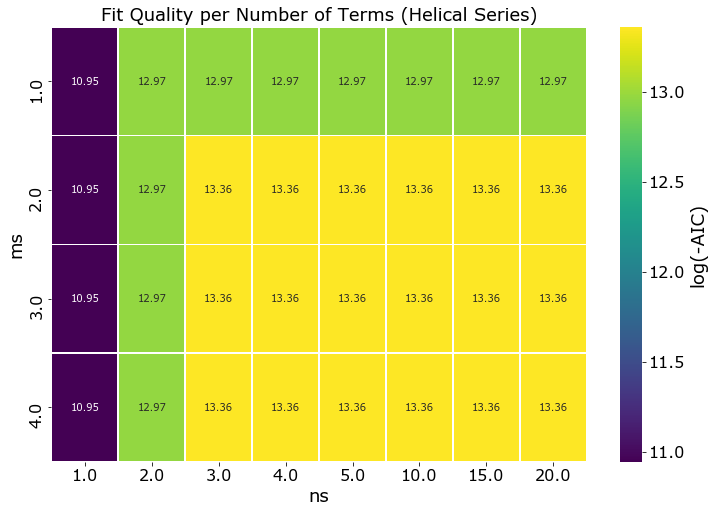

In [74]:
sns.heatmap(df_aic.query('ns>0 and ms>0').pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'})
plt.title('Fit Quality per Number of Terms (Helical Series)')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solA_helix.pdf')

In [34]:
m = 3
n = 13
cfg_pickle_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='opt_test', save_name='opt_test', recreate=False)
cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=m, ns_h1=n,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_long_cyl,
                                  cfg_geom_Cole_250mm_long_cyl, cfg_params_Hel_Opt,
                                  cfg_pickle_Opt, cfg_plot_none)
df_aic.query(f'ms=={m} and ns=={n}')['AIC'] = np.log(-ff.result.aic) 

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=3, ns_h1=13, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 41.0296 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 925
    # data points      = 28800
    # variables        = 91
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -632700.64231
    Bayesian info crit = -631948.24242
[[Variables]]
    pitch1:     0.1 (fixed)
    ms_h1:      3 (fixed)
    ns_h1:      13 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0 (fixed)
    ms_c1:      0 (fixed)
    ns_c1:      0 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ah1_0_0:    0 (fixed)
    Bh1_0_0:    0 (fixed)
    Ch1_0_0:   -1.1352e-11 +/- 0        (0.00%) (init= 1e-06)
    Dh1_0_0:    3.4231e-11 +/- 0        (0.00%) (init= 1e-06)
    

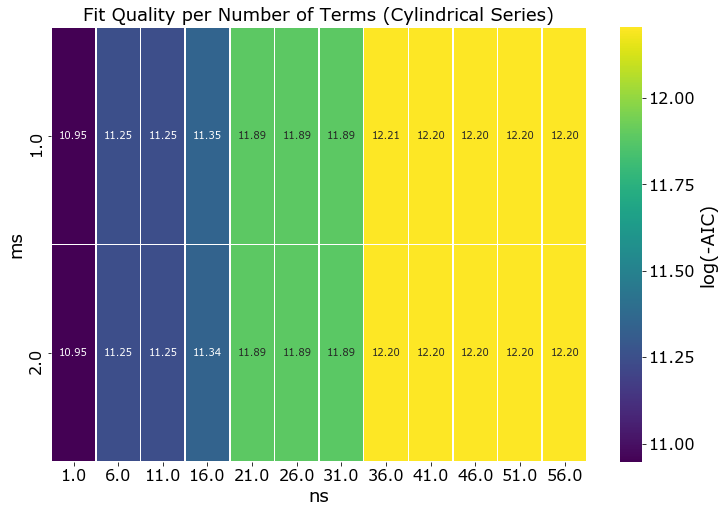

In [77]:
sns.heatmap(df_aic_cyl.query('ns>0').pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'})
plt.title('Fit Quality per Number of Terms (Cylindrical Series)')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solA_cyl.pdf')

In [37]:
df_aic.query(f'ms=={m} and ns=={n}')

,ms,ns,AIC
40,3.0,13.0,11.851818


In [38]:
df_aic.at[40, 'AIC'] = np.log(-ff.result.aic) 